<a href="https://colab.research.google.com/github/amihlyaeva/python/blob/main/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print('Функциональное программирование в Python')

Функциональное программирование в Python


In [ ]:
import requests
from requests.exceptions import HTTPError
import tarfile
import pandas as pd
from PIL import Image, ImageOps
import random
import numpy as np
import torchvision.transforms as T
import os

In [ ]:
# Загрузка файла
def Uploading_file():
   try:
      with requests.Session() as session:
           response = session.get('https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz')
           response.raise_for_status()

      with open('imagenette2.tgz', 'wb') as f:
           f.write(response.content)


   except Exception as err:
          print(f'Ошибка: {err}')

In [ ]:
#распаковка датасета
def unpacking_dataset():
   try:
      with tarfile.open('imagenette2.tgz', 'r:gz') as tar:
         tar.extractall(path='imagenette2')
   except Exception as err:
          print(f'Ошибка: {err}')

In [ ]:
#массив изображений
def array_images():
  df = pd.read_csv('/content/imagenette2/imagenette2/noisy_imagenette.csv')
  column_df = df['path']
  images = []
  try:
      for row in column_df.values:
          img_path = '/content/imagenette2/imagenette2/'+row
          img = Image.open(img_path)
          images.append(img)
  except Exception as err:
         print(f'Ошибка: {err}')
  return images

In [ ]:
# 1. Crop – обрезать изображение до HxW: 224x224 по заданным координатам
def Crop(image, x=0, y=0, height=224, width=224):
      return image.crop((x, y, x + width, y + height))

# 2. CenterCrop – обрезать по центру изображение до HxW: 224x224
def Center_Crop(image, width=224, height=224):
    img_width, img_height = image.size
    return image.crop(((img_width - width) // 2,
                       (img_height - height) // 2,
                       (img_width + width) // 2,
                       (img_height + height) // 2))

# 3. RandomCrop – вырезать изображение из случайного места размером HxW: 224x224
def Random_Crop(image, height=224, width=224):
    img_width, img_height = image.size
    left = random.randint(0, img_width - width)
    top = random.randint(0, img_height - height)
    return image.crop((left, top, left + width, top + height))

# 4. RandomVerticalFlip – перевернуть картинку с указанной вероятностью 0,25
def RandomVerticalFlip(image, p=25):
    return image.rotate(p)

# 5. RandomHorizontalFlip – зеркально отразить картинку с вероятностью 0,25
def RandomHorizontalFlip(image, p=25):
    return image.transpose(Image.FLIP_TOP_BOTTOM)

# 6. RandomInvert – инвертировать все цвета с вероятностью 0,15
def RandomInvert(image, p=0.15):
    transform = T.RandomInvert(p)
    return transform(image)

# 7. Normalize – нормализовать изображение по формуле `(Х - mean) / std`
def Normalize(image, mean, std):
    np_image = np.array(image).astype(np.float32)
    np_image = (np_image - mean) / std
    return Image.fromarray(np.uint8(np.clip(np_image, 0, 255)))

# 8. GrayScale – привести картинку с черно-белому изображению
def GrayScale(image):
    return image.convert("L")

In [ ]:
#выполнение
Uploading_file()
unpacking_dataset()
images = array_images()
len(images)

13394

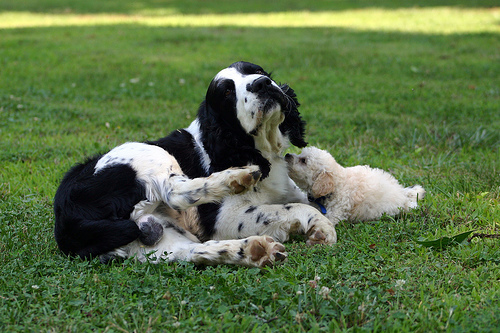

In [ ]:
len_images = len(images)
random_inx = random.randrange(0, len_images)
images[random_inx]

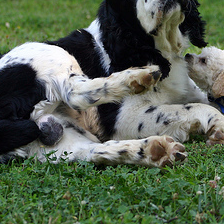

In [ ]:
Crop(images[random_inx],100,100,224,224)

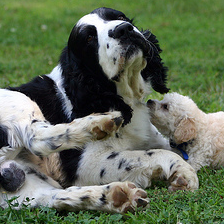

In [ ]:
Center_Crop(images[random_inx],224,224)

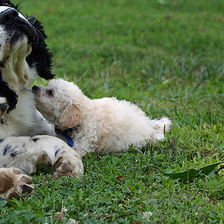

In [ ]:
Random_Crop(images[random_inx],224,224)

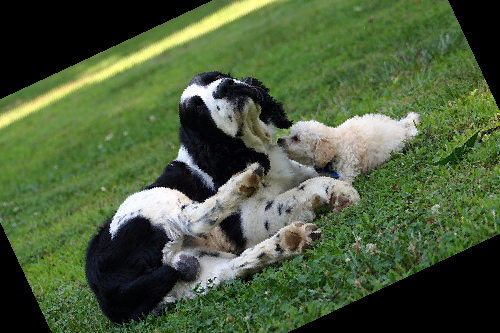

In [ ]:
RandomVerticalFlip(images[random_inx])

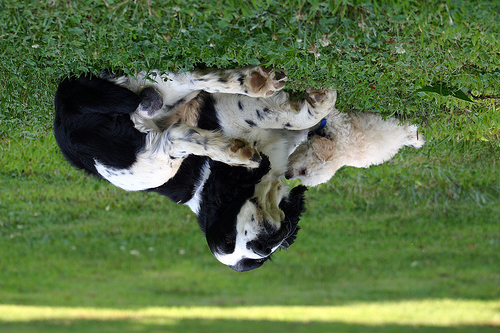

In [ ]:
RandomHorizontalFlip(images[random_inx])

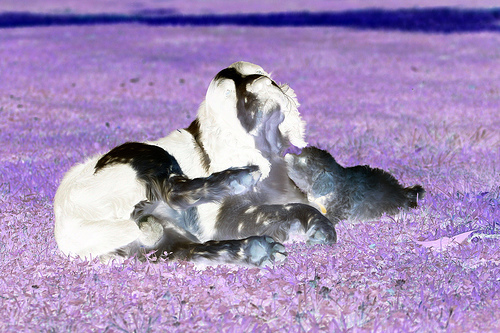

In [ ]:
RandomInvert(images[random_inx])

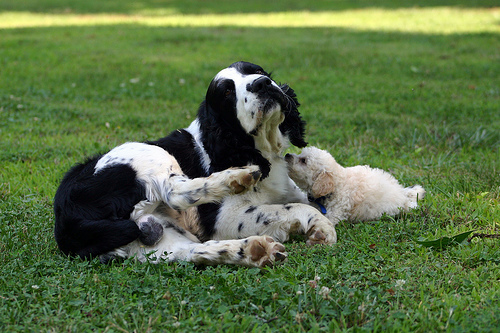

In [ ]:
Normalize(images[random_inx],1,1)

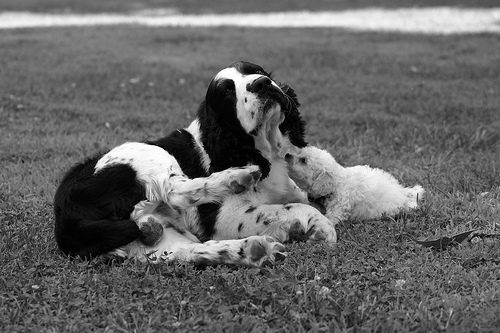

In [ ]:
GrayScale(images[random_inx])

In [ ]:
processed_images = []
for img in images[:10]:
    img = Center_Crop(img,224,224)
    img = Random_Crop(img,224,224)
    processed_images.append(img)

processed_images

[<PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>]